# 37.3 Final Capstone

In [828]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as grid_spec
import seaborn as sns

# NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import gensim

sns.set_style('dark')
plt.style.use('dark_background')
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'sans-serif']

pd.options.display.float_format = '{:,.2f}'.format

%config InlineBackend.figure_format = 'retina'



In [829]:
whisky = pd.read_csv('whisky1.csv', skiprows=0, index_col=0, 
                     dtype= {'year':'Int64','age':'Int64', 'vintage':'Int64'} )

In [830]:
whisky.info()
whisky.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5076 entries, 0 to 5075
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    5076 non-null   int64  
 1   label     5076 non-null   object 
 2   category  5076 non-null   object 
 3   review    5076 non-null   object 
 4   reviewer  5076 non-null   object 
 5   year      5076 non-null   Int64  
 6   abv       5050 non-null   float64
 7   price     5076 non-null   float64
 8   age       1908 non-null   Int64  
 9   vintage   1147 non-null   Int64  
dtypes: Int64(3), float64(2), int64(1), object(4)
memory usage: 451.1+ KB


rating                                              label  \
0      97      Black Bowmore 42 year old 1964 vintage, 40.5%   
1      97        Bowmore 46 year old (distilled 1964), 42.9%   
2      97                     Johnnie Walker Blue Label, 40%   
3      96    Glenlivet Cellar Collection 1969 vintage, 50.8%   
4      96  The Macallan 29 year old 1976 Vintage (Cask #1...   

                category                                             review  \
0     Single Malt Scotch  What impresses me most is how this whisky evol...   
1     Single Malt Scotch  There have been some legendary Bowmores from t...   
2  Blended Scotch Whisky  Magnificently powerful and intense. Caramels, ...   
3     Single Malt Scotch  It’s great that Glenlivet releases whiskies un...   
4     Single Malt Scotch  Classic sherry cask-aged Macallan. Antique amb...   

          reviewer  year   abv     price   age  vintage  
0     John Hansell  2008 40.50  4,500.00    42     1964  
1       Dave Broom  2012 42.90 13,500.00    46     1964  
2  Jonny McCormick  2018 40.00    225.00  <NA>     <NA>  
3     John Hansell  2007 50.80    750.00  <NA>     1969  
4     John Hansell  2008 45.40  1,500.00    29     1976

In [831]:
whisky.iloc[3702]

rating                                                     85
label                                 Balcones Brimstone, 53%
category                                        Craft Whiskey
review      Oddly smoky nose that grows on you — this is b...
reviewer                                           Lew Bryson
year                                                     2012
abv                                                     53.00
price                                                   74.00
age                                                      <NA>
vintage                                                  <NA>
Name: 3702, dtype: object

In [832]:
whisky.reviewer.unique()

array(['John Hansell', 'Dave Broom', 'Jonny McCormick', 'Dominic Roskrow',
       'Gavin Smith', 'Geoffrey Kleinman', 'Susannah Skiver Barton',
       'David Fleming', 'Adam Polonski', 'Fred Minnick',
       'Jeffery Lindenmuth', 'Davin de Kergommeaux', 'Lew Bryson'],
      dtype=object)

In [361]:
# graphs to look at:
# Bar graph for category / count
# histogram of rating, abv, price
# correlation plots = rating/price, age/price, age/rating
# bar graph of reviewers / count
# after NLP, word cloud to see most common words by reviewer

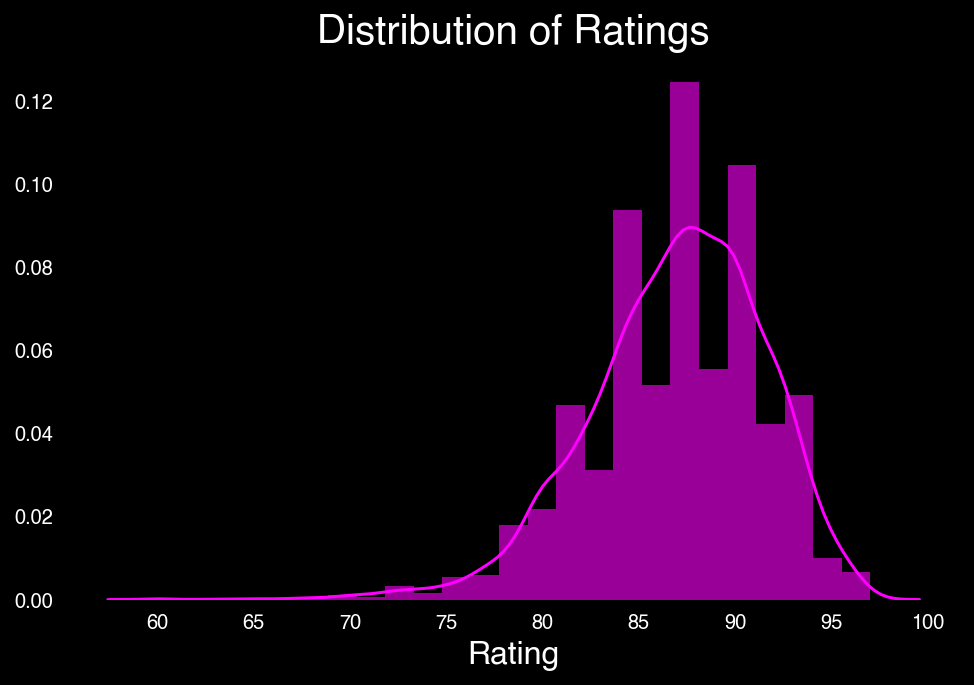

In [833]:
# plotting ratings distribution
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(whisky.rating, bins=25, color='magenta', ax=ax, hist_kws={'linewidth':0, 'alpha':.6})
ax.set_title('Distribution of Ratings', fontsize=20)
ax.set_xticks(np.arange(60,101,5))
ax.set_xlabel('Rating', fontsize=16);

for i in ['top','right','left', 'bottom']:
    ax.spines[i].set_visible(False)

In [834]:
print(whisky.rating.max())
print(whisky.rating.min())

97
60


In [835]:
whisky.iloc[4488:4492]

rating                                              label  \
4488      65  Chinook Limited Edition Signature Rye Whisky, ...   
4489      96  Yamazaki Mizunara Cask 18 year old (2017 Editi...   
4490      96                       Yoichi 1988 single cask, 62%   
4491      95                 Nikka 12 year old Coffey Malt, 55%   

             category                                             review  \
4488         Canadian  With its overt floral perfume notes and the sc...   
4489  Japanese Whisky  When whisky lovers talk about the grandeur of ...   
4490  Japanese Whisky  Though aged in virgin American oak, it’s disti...   
4491  Japanese Whisky  Produced at Miyagikyo’s grain distillery from ...   

             reviewer  year   abv    price   age  vintage  
4488  Jonny McCormick  2018 44.90    17.00  <NA>     <NA>  
4489       Dave Broom  2013 48.00 1,000.00    18     2017  
4490       Dave Broom  2010 62.00   250.00  <NA>     1988  
4491       Dave Broom  2010 55.00   153.00    12     <NA>

In [836]:
whisky[whisky.label == 'Chinook Limited Edition Signature Rye Whisky, 44.9%']

rating                                              label  category  \
4488      65  Chinook Limited Edition Signature Rye Whisky, ...  Canadian   

                                                 review         reviewer  \
4488  With its overt floral perfume notes and the sc...  Jonny McCormick   

      year   abv  price   age  vintage  
4488  2018 44.90  17.00  <NA>     <NA>

In [837]:
whisky[whisky.rating==60]

rating                                              label  \
4223      60                                       Cavalry, 45%   
4224      60  Woodford Reserve Master’s Collection Five Malt...   

                      category  \
4223         Bourbon/Tennessee   
4224  Blended American Whiskey   

                                                 review              reviewer  \
4223  Although it’s not on the label, Cavalry uses t...          Fred Minnick   
4224  Four barley types—two row, pale chocolate, kil...  Davin de Kergommeaux   

      year   abv  price   age  vintage  
4223  2016 45.00  30.00  <NA>     <NA>  
4224  2014 45.20  50.00  <NA>     <NA>

In [838]:
print(sorted(whisky.year.unique()))
# 1992 is the odd one out and we aren't completely through 2020, so we'll filter those out in the year analysis

[1992, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [839]:
# number of reviews per year
years_filtered = whisky[(whisky.year < 2020)&(whisky.year>1992)]
reviews_by_year = years_filtered[['review','year']].groupby('year').count()

fig, ax = plt.subplots(figsize=(8,5))

reviews_by_year.plot(color='magenta', legend=False, ax=ax)
ax.fill_between(np.arange(2000,2020), reviews_by_year.review, color='magenta', alpha=.5)
ax.set(xlim=(2000,2019), xticks=[2001,2003,2005,2007,2009,2011,2013,2015,2017,2019], xlabel='')
ax.set_title('Reviews Per Year', fontsize=20)

for i in ['top','bottom','right','left']:
    ax.spines[i].set_visible(False)

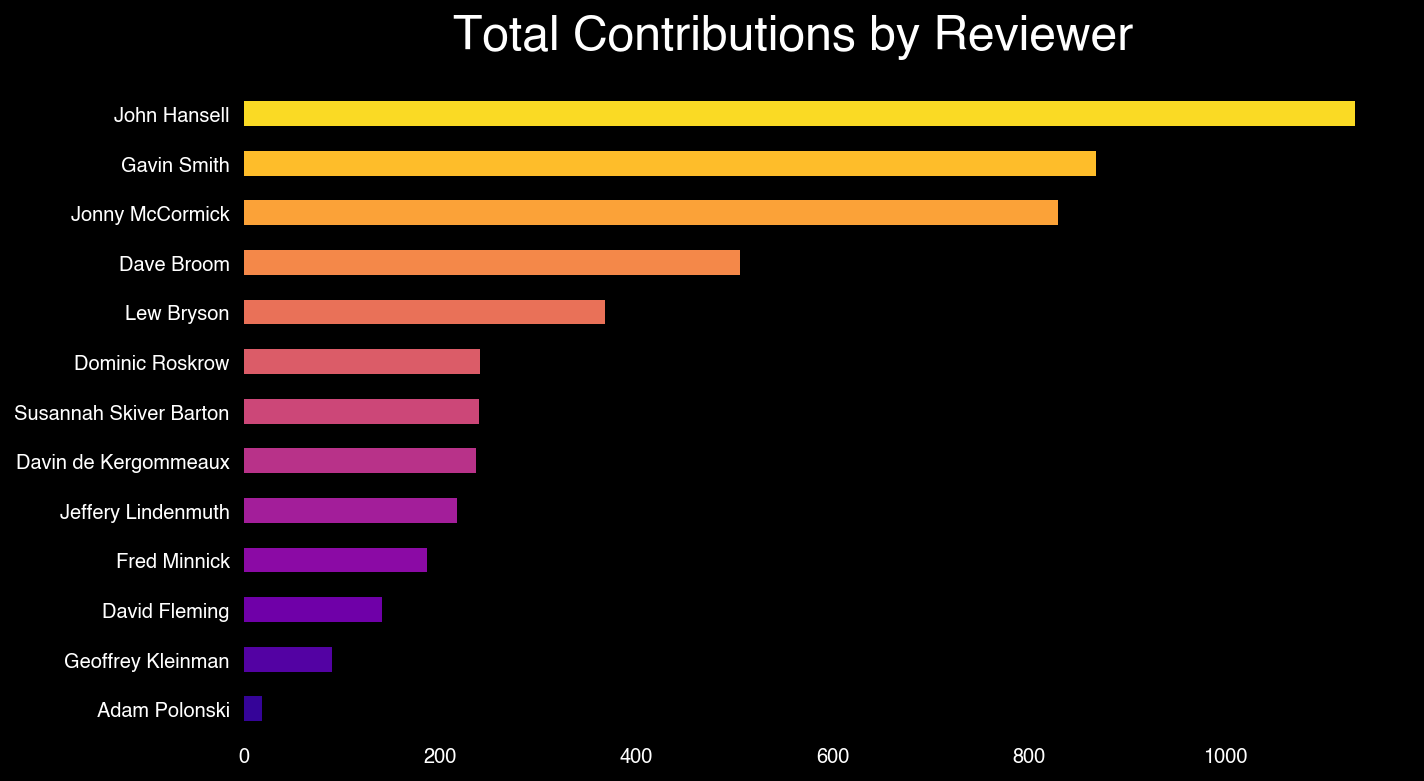

In [840]:
# reviews per reviewer
reviews_by_reviewer = whisky[['review','reviewer']].groupby('reviewer').count().sort_values(by='review')

fig,ax = plt.subplots(figsize=(10,5))
reviews_by_reviewer.plot(kind='barh', y='review', legend=None, 
                         color=sns.color_palette('plasma',n_colors=len(whisky.reviewer.unique())),
                         linewidth=0, ax=ax);

for i in ['top', 'bottom','right','left']:
    ax.spines[i].set_visible(False)

fig.text(0.32,1.025,"Total Contributions by Reviewer",fontsize=24)
ax.set_ylabel('')
plt.tight_layout();

<ipython-input-841-0ad4e32b8aa2>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


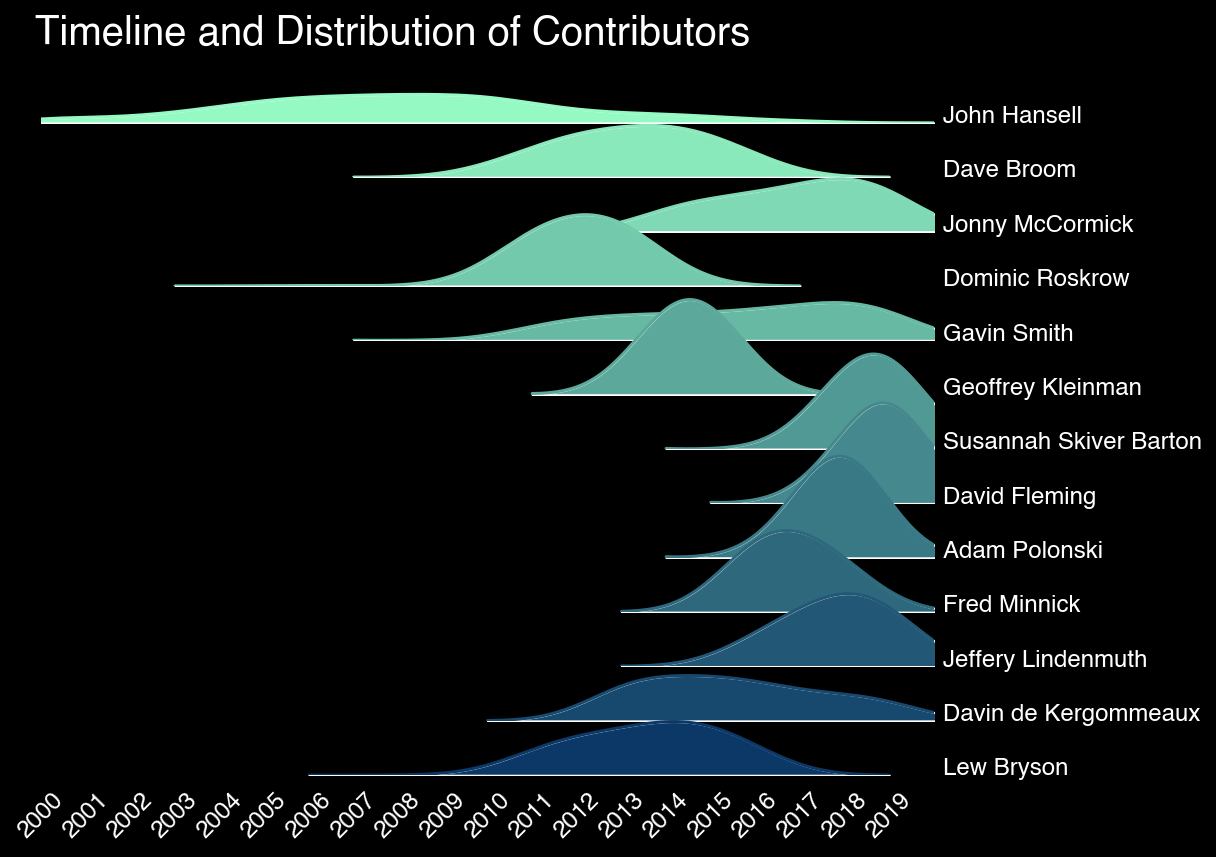

In [841]:
# Reviewer contributions over the years
reviewers = pd.Series(whisky.reviewer.unique())
colors = ['#95F9C3', '#8AE9BB','#7ED9B4','#73C9AC','#67B9A4','#5CA99C',
          '#509995','#45888D','#397885', '#2E687D','#225876',
          '#17486e','#0b3866'
         ]

gs = grid_spec.GridSpec(len(reviewers),1)
fig = plt.figure(figsize=(8,7))

i = 0

ax_objs = []
for reviewer in reviewers:
    reviewer = reviewers[i]
    x = np.array(years_filtered[years_filtered.reviewer == reviewer].year)

    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    sns.kdeplot(x, bw=1, shade=True, alpha=1, color=colors[i], ax=ax_objs[-1])

    # setting uniform x and y lims
    ax_objs[-1].set_xlim(2000,2020)
    ax_objs[-1].set_ylim(0,.4)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])

    if i == len(reviewers)-1:
        ax_objs[-1].set_xlabel("", fontsize=16,fontweight="bold")
        ax_objs[-1].set_xticks(sorted(years_filtered.year.unique()))
        ax_objs[-1].set_xticklabels([i for i in sorted(years_filtered.year.unique())], 
                                    fontsize=12, rotation=45)
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    #adj_reviewers = reviewer.replace(" ","\n")
    ax_objs[-1].text(2020.2,0,reviewers[i],fontsize=12,ha="left")


    i += 1

gs.update(hspace=-0.5)

fig.text(0.12,0.85,"Timeline and Distribution of Contributors",fontsize=20)

plt.tight_layout()
plt.show();

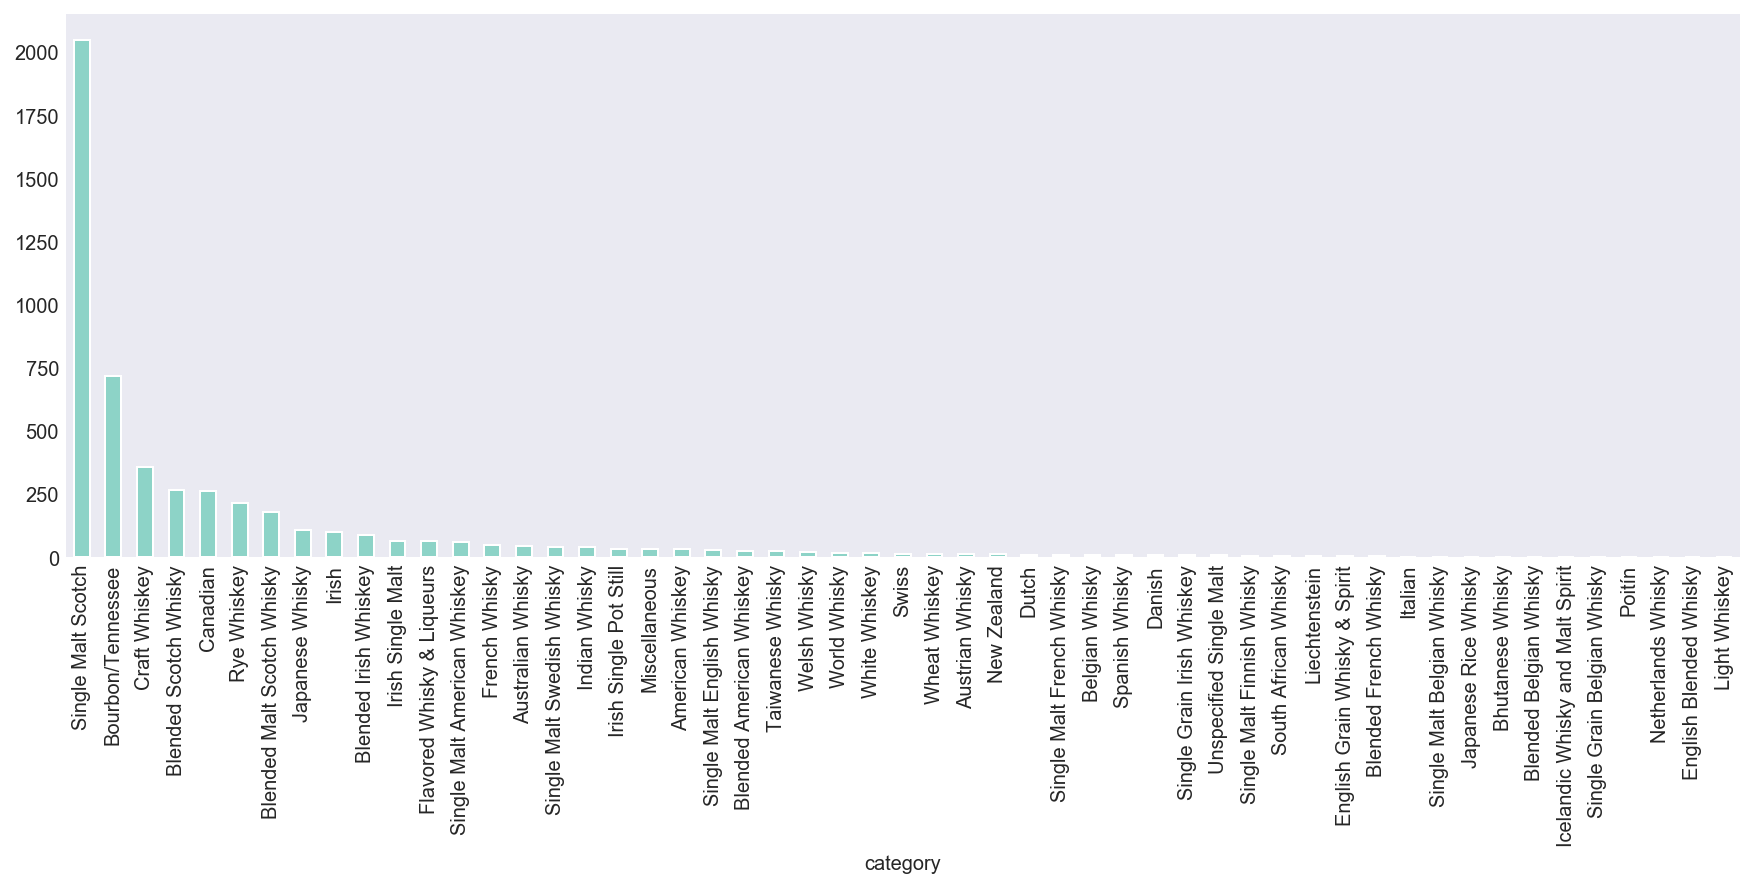

In [1094]:
# Category counts
category_counts = whisky[['label','category']].groupby('category').count().sort_values(by='label',ascending=False)

fig, ax = plt.subplots(figsize=(15,5))
category_counts.plot(kind='bar', legend=False, ax=ax)

In [1104]:
whisky.head()

rating                                              label  \
0      97      Black Bowmore 42 year old 1964 vintage, 40.5%   
1      97        Bowmore 46 year old (distilled 1964), 42.9%   
2      97                     Johnnie Walker Blue Label, 40%   
3      96    Glenlivet Cellar Collection 1969 vintage, 50.8%   
4      96  The Macallan 29 year old 1976 Vintage (Cask #1...   

                category                                             review  \
0     Single Malt Scotch  What impresses me most is how this whisky evol...   
1     Single Malt Scotch  There have been some legendary Bowmores from t...   
2  Blended Scotch Whisky  Magnificently powerful and intense. Caramels, ...   
3     Single Malt Scotch  It’s great that Glenlivet releases whiskies un...   
4     Single Malt Scotch  Classic sherry cask-aged Macallan. Antique amb...   

          reviewer  year   abv     price   age  vintage  \
0     John Hansell  2008 40.50  4,500.00    42     1964   
1       Dave Broom  2012 42.90 13,500.00    46     1964   
2  Jonny McCormick  2018 40.00    225.00  <NA>     <NA>   
3     John Hansell  2007 50.80    750.00  <NA>     1969   
4     John Hansell  2008 45.40  1,500.00    29     1976   

                                                text  
0  black bowmor 42 year old 1964 vintag 40 singl ...  
1  bowmor 46 year old distil 1964 42 singl malt s...  
2  johnni walker blue label 40 blend scotch whisk...  
3  glenlivet cellar collect 1969 vintag 50 singl ...  
4  macallan 29 year old 1976 vintag cask 11354 45...

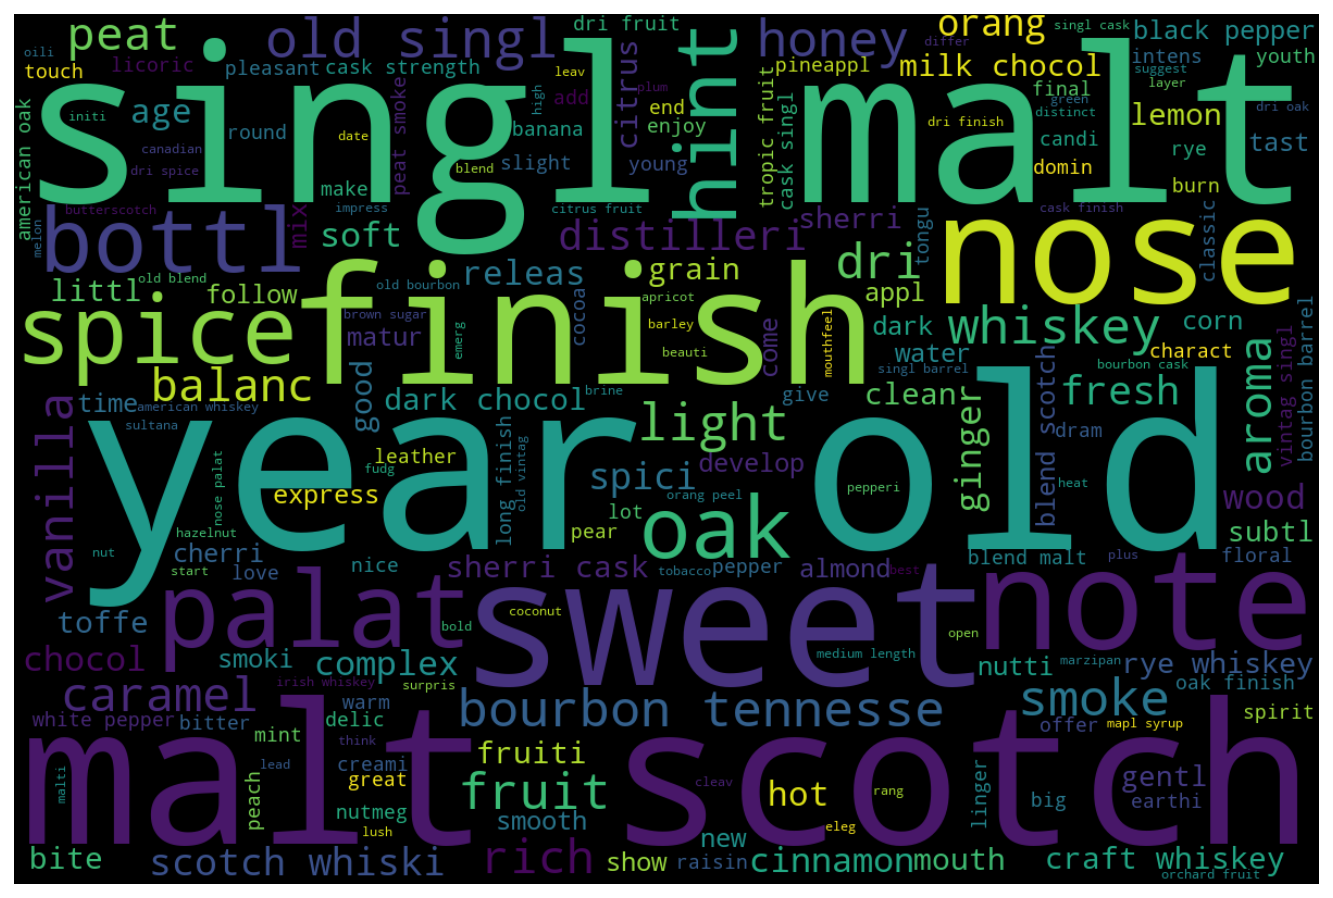

In [1103]:
# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(["drink", "whiski", "flavor"])

text = " ".join(review for review in whisky.text)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords).generate(text)

# Display the generated image:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Linear Regression

In [842]:
whisky.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5076 entries, 0 to 5075
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    5076 non-null   int64  
 1   label     5076 non-null   object 
 2   category  5076 non-null   object 
 3   review    5076 non-null   object 
 4   reviewer  5076 non-null   object 
 5   year      5076 non-null   Int64  
 6   abv       5050 non-null   float64
 7   price     5076 non-null   float64
 8   age       1908 non-null   Int64  
 9   vintage   1147 non-null   Int64  
dtypes: Int64(3), float64(2), int64(1), object(4)
memory usage: 451.1+ KB


In [843]:
whisky_age = whisky.copy()
whisky_age = whisky_age[['rating', 'label', 'abv','price','age']]

In [844]:
whisky_age.dropna(inplace=True)
whisky_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 5070
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  1900 non-null   int64  
 1   label   1900 non-null   object 
 2   abv     1900 non-null   float64
 3   price   1900 non-null   float64
 4   age     1900 non-null   Int64  
dtypes: Int64(1), float64(2), int64(1), object(1)
memory usage: 90.9+ KB


In [845]:
sns.pairplot(whisky_age);

In [846]:
whisky_age['price_winz'] = winsorize(whisky_age.price, (0,0.15))
whisky_age['age_winz'] = winsorize(whisky_age.age, (0,0.1))

In [847]:
whisky_age['age_winz']= pd.to_numeric(whisky_age.age_winz)

In [848]:
whisky_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 5070
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      1900 non-null   int64  
 1   label       1900 non-null   object 
 2   abv         1900 non-null   float64
 3   price       1900 non-null   float64
 4   age         1900 non-null   Int64  
 5   price_winz  1900 non-null   float64
 6   age_winz    1900 non-null   int64  
dtypes: Int64(1), float64(3), int64(2), object(1)
memory usage: 200.6+ KB


In [849]:
sns.boxplot(x='variable', y='value', data=pd.melt(whisky_age[['rating','abv','price_winz','age_winz']]))

In [850]:
sns.set_style('dark')
sns.pairplot(whisky_age[['price_winz','age_winz','abv','rating']]);

In [851]:
whisky_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 5070
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      1900 non-null   int64  
 1   label       1900 non-null   object 
 2   abv         1900 non-null   float64
 3   price       1900 non-null   float64
 4   age         1900 non-null   Int64  
 5   price_winz  1900 non-null   float64
 6   age_winz    1900 non-null   int64  
dtypes: Int64(1), float64(3), int64(2), object(1)
memory usage: 200.6+ KB


In [852]:
# linear regression between age and price
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = whisky_age[['age_winz','abv']]
y = whisky_age['price_winz']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=22)

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:             price_winz   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     1336.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:22:18   Log-Likelihood:                -8255.9
No. Observations:                1520   AIC:                         1.652e+04
Df Residuals:                    1517   BIC:                         1.653e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.0579     11.870    -15.507      0.0

Here we see that age and abv do have an affect on price. (Rating was not included since it is given to the whisky after it is already brought to the market, therefore it would not have an affect on price)

For every year the whisky stays in the barrel, the price for whisky increases by \$9.55

For every percent increase of ABV, the price increases by \$3.24

The constant even tells an interesting story. If the age of the corn liquour and the ABV are both 0, then the price would be -\$184.05. And I don't know about you, but you couldn't pay me to drink non-alcoholic corn liqour that's been quickly passed through a barrell.

In [854]:
X = whisky_age[['age_winz','abv','price']]
y = whisky_age['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=22)

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.69
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           4.47e-21
Time:                        11:23:14   Log-Likelihood:                -4322.9
No. Observations:                1520   AIC:                             8654.
Df Residuals:                    1516   BIC:                             8675.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.8798      0.894     91.622      0.0

Here we can see that while there are siginificant findings with age and abv, they have very little affect on the rating of the whisky (as should be the case since the rating should be based on taste alone). 

# NLP
---

In [855]:
whisky.head()

rating                                              label  \
0      97      Black Bowmore 42 year old 1964 vintage, 40.5%   
1      97        Bowmore 46 year old (distilled 1964), 42.9%   
2      97                     Johnnie Walker Blue Label, 40%   
3      96    Glenlivet Cellar Collection 1969 vintage, 50.8%   
4      96  The Macallan 29 year old 1976 Vintage (Cask #1...   

                category                                             review  \
0     Single Malt Scotch  What impresses me most is how this whisky evol...   
1     Single Malt Scotch  There have been some legendary Bowmores from t...   
2  Blended Scotch Whisky  Magnificently powerful and intense. Caramels, ...   
3     Single Malt Scotch  It’s great that Glenlivet releases whiskies un...   
4     Single Malt Scotch  Classic sherry cask-aged Macallan. Antique amb...   

          reviewer  year   abv     price   age  vintage  
0     John Hansell  2008 40.50  4,500.00    42     1964  
1       Dave Broom  2012 42.90 13,500.00    46     1964  
2  Jonny McCormick  2018 40.00    225.00  <NA>     <NA>  
3     John Hansell  2007 50.80    750.00  <NA>     1969  
4     John Hansell  2008 45.40  1,500.00    29     1976

In [856]:
# Creating a variable with all of the relevant words regarding each whisky
whisky['text'] = whisky['label'] + " " + whisky['category'] + " " + whisky['review']

In [857]:
whisky.head()

rating                                              label  \
0      97      Black Bowmore 42 year old 1964 vintage, 40.5%   
1      97        Bowmore 46 year old (distilled 1964), 42.9%   
2      97                     Johnnie Walker Blue Label, 40%   
3      96    Glenlivet Cellar Collection 1969 vintage, 50.8%   
4      96  The Macallan 29 year old 1976 Vintage (Cask #1...   

                category                                             review  \
0     Single Malt Scotch  What impresses me most is how this whisky evol...   
1     Single Malt Scotch  There have been some legendary Bowmores from t...   
2  Blended Scotch Whisky  Magnificently powerful and intense. Caramels, ...   
3     Single Malt Scotch  It’s great that Glenlivet releases whiskies un...   
4     Single Malt Scotch  Classic sherry cask-aged Macallan. Antique amb...   

          reviewer  year   abv     price   age  vintage  \
0     John Hansell  2008 40.50  4,500.00    42     1964   
1       Dave Broom  2012 42.90 13,500.00    46     1964   
2  Jonny McCormick  2018 40.00    225.00  <NA>     <NA>   
3     John Hansell  2007 50.80    750.00  <NA>     1969   
4     John Hansell  2008 45.40  1,500.00    29     1976   

                                                text  
0  Black Bowmore 42 year old 1964 vintage, 40.5% ...  
1  Bowmore 46 year old (distilled 1964), 42.9% Si...  
2  Johnnie Walker Blue Label, 40% Blended Scotch ...  
3  Glenlivet Cellar Collection 1969 vintage, 50.8...  
4  The Macallan 29 year old 1976 Vintage (Cask #1...

In [858]:
# NLP processing, stemming
from nltk.tokenize import word_tokenize
# creating a list of extra stop words to filter out and help differentiate the articles
whisky_words = ['whisky', 'whiskey', 'whiski']

stop_words = stopwords.words('english')
stop_words.extend(whisky_words)
stemmer = SnowballStemmer("english")

TAGS = re.compile('<.*?>')
PUNCT = re.compile("([.;:!\'?,\"()\[\]])|(\-)|(\/)|(\\n)|(\\r)|(\*)")


def formatting(body):
    body = body.lower()
    body = TAGS.sub(' ', body)
    body = PUNCT.sub(' ', body)
    return body

def RemoveWhiskyWords(toPrint):
    pattern = re.compile(r"\b(" + "|".join(whisky_words) + ")\\W", re.I)
    return pattern.sub("", toPrint)

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


# Tried word_tokenize - also removed numbers
# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in word_tokenize(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 1:
            result.append(lemmatize_stemming(token))         
    return ' '.join(result)

# Original - removed all numbers
#def preprocess(text):
#    result=[]
#    for token in gensim.utils.simple_preprocess(text) :
#        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
#            result.append(lemmatize_stemming(token))         
#    return ' '.join(result)

In [859]:
test = whisky.text[500]
test

"King's Crest, 25 year old, 40% Blended Scotch Whisky Amber gold color. Aromas of delicate fruit, coconut, vanilla and toffee, with delicate background oak notes. The flavor delivers what the aroma promises. It is nicely balanced, with a lingering dryish finish. \r\n"

In [860]:
test = formatting(test)
test

'king s crest  25 year old  40% blended scotch whisky amber gold color  aromas of delicate fruit  coconut  vanilla and toffee  with delicate background oak notes  the flavor delivers what the aroma promises  it is nicely balanced  with a lingering dryish finish    '

In [861]:
test = preprocess(test)
test

'king crest 25 year old 40 blend scotch whiski amber gold color aroma delic fruit coconut vanilla toffe delic background oak note flavor deliv aroma promis nice balanc linger dryish finish'

In [863]:
whisky['text'] = whisky.text.apply(formatting)
whisky['text'] = whisky.text.apply(preprocess)

In [864]:
whisky.head()

rating                                              label  \
0      97      Black Bowmore 42 year old 1964 vintage, 40.5%   
1      97        Bowmore 46 year old (distilled 1964), 42.9%   
2      97                     Johnnie Walker Blue Label, 40%   
3      96    Glenlivet Cellar Collection 1969 vintage, 50.8%   
4      96  The Macallan 29 year old 1976 Vintage (Cask #1...   

                category                                             review  \
0     Single Malt Scotch  What impresses me most is how this whisky evol...   
1     Single Malt Scotch  There have been some legendary Bowmores from t...   
2  Blended Scotch Whisky  Magnificently powerful and intense. Caramels, ...   
3     Single Malt Scotch  It’s great that Glenlivet releases whiskies un...   
4     Single Malt Scotch  Classic sherry cask-aged Macallan. Antique amb...   

          reviewer  year   abv     price   age  vintage  \
0     John Hansell  2008 40.50  4,500.00    42     1964   
1       Dave Broom  2012 42.90 13,500.00    46     1964   
2  Jonny McCormick  2018 40.00    225.00  <NA>     <NA>   
3     John Hansell  2007 50.80    750.00  <NA>     1969   
4     John Hansell  2008 45.40  1,500.00    29     1976   

                                                text  
0  black bowmor 42 year old 1964 vintag 40 singl ...  
1  bowmor 46 year old distil 1964 42 singl malt s...  
2  johnni walker blue label 40 blend scotch whisk...  
3  glenlivet cellar collect 1969 vintag 50 singl ...  
4  macallan 29 year old 1976 vintag cask 11354 45...

## Vectorization
___

In [865]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop_words, max_df=.7, min_df=0, ngram_range=(1,2), max_features=3000)

# fit / transform
fitted_vectorizer=tfidf.fit(whisky.text)
tfidf_vectors=fitted_vectorizer.transform(whisky.text)

# to data frame with words as columns
whisky_tfidf = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf.get_feature_names())

whisky_tfidf.head()

000  000 bottl   10  10 year  100  100 proof  100 rye   11  11 year  110  \
0 0.00       0.00 0.00     0.00 0.00       0.00     0.00 0.00     0.00 0.00   
1 0.00       0.00 0.00     0.00 0.00       0.00     0.00 0.00     0.00 0.00   
2 0.00       0.00 0.00     0.00 0.00       0.00     0.00 0.00     0.00 0.00   
3 0.00       0.00 0.00     0.00 0.00       0.00     0.00 0.00     0.00 0.00   
4 0.00       0.00 0.00     0.00 0.00       0.00     0.00 0.00     0.00 0.00   

   ...  young  younger  younger sibl  youngest  youth  zealand  zest  zesti  \
0  ...   0.00     0.00          0.00      0.00   0.00     0.00  0.00   0.00   
1  ...   0.00     0.00          0.00      0.00   0.00     0.00  0.00   0.00   
2  ...   0.00     0.00          0.00      0.00   0.00     0.00  0.00   0.00   
3  ...   0.00     0.00          0.00      0.00   0.00     0.00  0.00   0.00   
4  ...   0.00     0.00          0.00      0.00   0.00     0.00  0.00   0.00   

   zing  zingi  
0  0.00   0.00  
1  0.00   0.00  
2  0.00   0.00  
3  0.00   0.00  
4  0.00   0.00  

[5 rows x 3000 columns]

In [1049]:
top_tens=[]
for i in range(whisky_tfidf.shape[0]):
    row = whisky_tfidf.iloc[i]
    top_tens.append(" ".join(list(row[row>0].sort_values(ascending=False)[:10].index)))

whisky_tfidf['tfidf_top_tens'] = pd.Series(top_tens)

In [1050]:
whisky_tfidf.head()

000  000 bottl   10  10 year  100  100 proof  100 rye   11  11 year  110  \
0 0.00       0.00 0.00     0.00 0.00       0.00     0.00 0.00     0.00 0.00   
1 0.00       0.00 0.00     0.00 0.00       0.00     0.00 0.00     0.00 0.00   
2 0.00       0.00 0.00     0.00 0.00       0.00     0.00 0.00     0.00 0.00   
3 0.00       0.00 0.00     0.00 0.00       0.00     0.00 0.00     0.00 0.00   
4 0.00       0.00 0.00     0.00 0.00       0.00     0.00 0.00     0.00 0.00   

   ...  younger  younger sibl  youngest  youth  zealand  zest  zesti  zing  \
0  ...     0.00          0.00      0.00   0.00     0.00  0.00   0.00  0.00   
1  ...     0.00          0.00      0.00   0.00     0.00  0.00   0.00  0.00   
2  ...     0.00          0.00      0.00   0.00     0.00  0.00   0.00  0.00   
3  ...     0.00          0.00      0.00   0.00     0.00  0.00   0.00  0.00   
4  ...     0.00          0.00      0.00   0.00     0.00  0.00   0.00  0.00   

   zingi                                     tfidf_top_tens  
0   0.00  hope sticki toffe fig cake vintag 40 game pala...  
1   0.00  bowmor legendari headi 42 singl bear low last ...  
2   0.00  seed smoke deepli smoke dri vanilla bean caram...  
3   0.00  glenlivet cellar collect 1969 vintag vanilla r...  
4   0.00  macallan antiqu amber 1976 29 year multi thick...  

[5 rows x 3001 columns]

## Decomposition
---

In [1054]:
from sklearn.preprocessing import StandardScaler

X = whisky_tfidf.iloc[:,:-1]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=3)
result = pca.fit_transform(X)
# create a scatter plot of the projection


plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [1062]:
import plotly.graph_objects as go
# PCA 3D
pca = PCA(n_components=3).fit_transform(X_std)

fig = go.Figure(data=[go.Scatter3d(
    x=pca[:,0],
    y=pca[:,1],
    z=pca[:,2],
    mode='markers',
    marker=dict(
        size=3,
        #color=whisky.category, 
        #colorscale='viridis',
    ),
    
    hovertemplate =
    '<b>Main Topics</b>:<br>%{text}</br><extra></extra>',
    text = ['{}'.format(i) for i in whisky_tfidf.tfidf_top_tens],
    

)])

# tight layout
fig.update_layout(height=400,
                  title_text='PCA',
                  margin=dict(l=0, r=0, b=0, t=40),
                 paper_bgcolor='#000000',
                 plot_bgcolor='#000000',
                 scene=dict(xaxis=dict(visible=False,
                                      ),
                            yaxis=dict(visible=False
                                      ),
                            zaxis=dict(visible=False
                                      )
                           ),
                  dragmode='orbit'
                 )

fig.show()

In [1071]:
import umap
# UMAP visual for X Standardized and predicted LDA overlay
umap_results = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='cosine', 
                         n_components=3, random_state=22).fit_transform(X_std)

In [1072]:
fig = go.Figure(data=[go.Scatter3d(
            x=umap_results[:,0],
            y=umap_results[:,1],
            z=umap_results[:,2],
            mode='markers',
            marker=dict(
                size=3,
                #color=covid_lda.prob_topic, 
                #colorscale='viridis',
            ),
    hovertemplate =
    '<b>Main Topics</b>:<br>%{text}</br><extra></extra>',
    text = ['{}'.format(i) for i in whisky_tfidf.tfidf_top_tens],
        )])

fig.update_layout(height=500,
                  width=500,
                  title_text='UMAP with LDA Topic Overlay',
                  margin=dict(l=0, r=0, b=0, t=40),
                 paper_bgcolor='#000000',
                 plot_bgcolor='#000000',
                 scene=dict(xaxis=dict(visible=False,
                                      ),
                            yaxis=dict(visible=False
                                      ),
                            zaxis=dict(visible=False
                                      )
                           ),
                  dragmode='orbit'
                 )
fig.show()

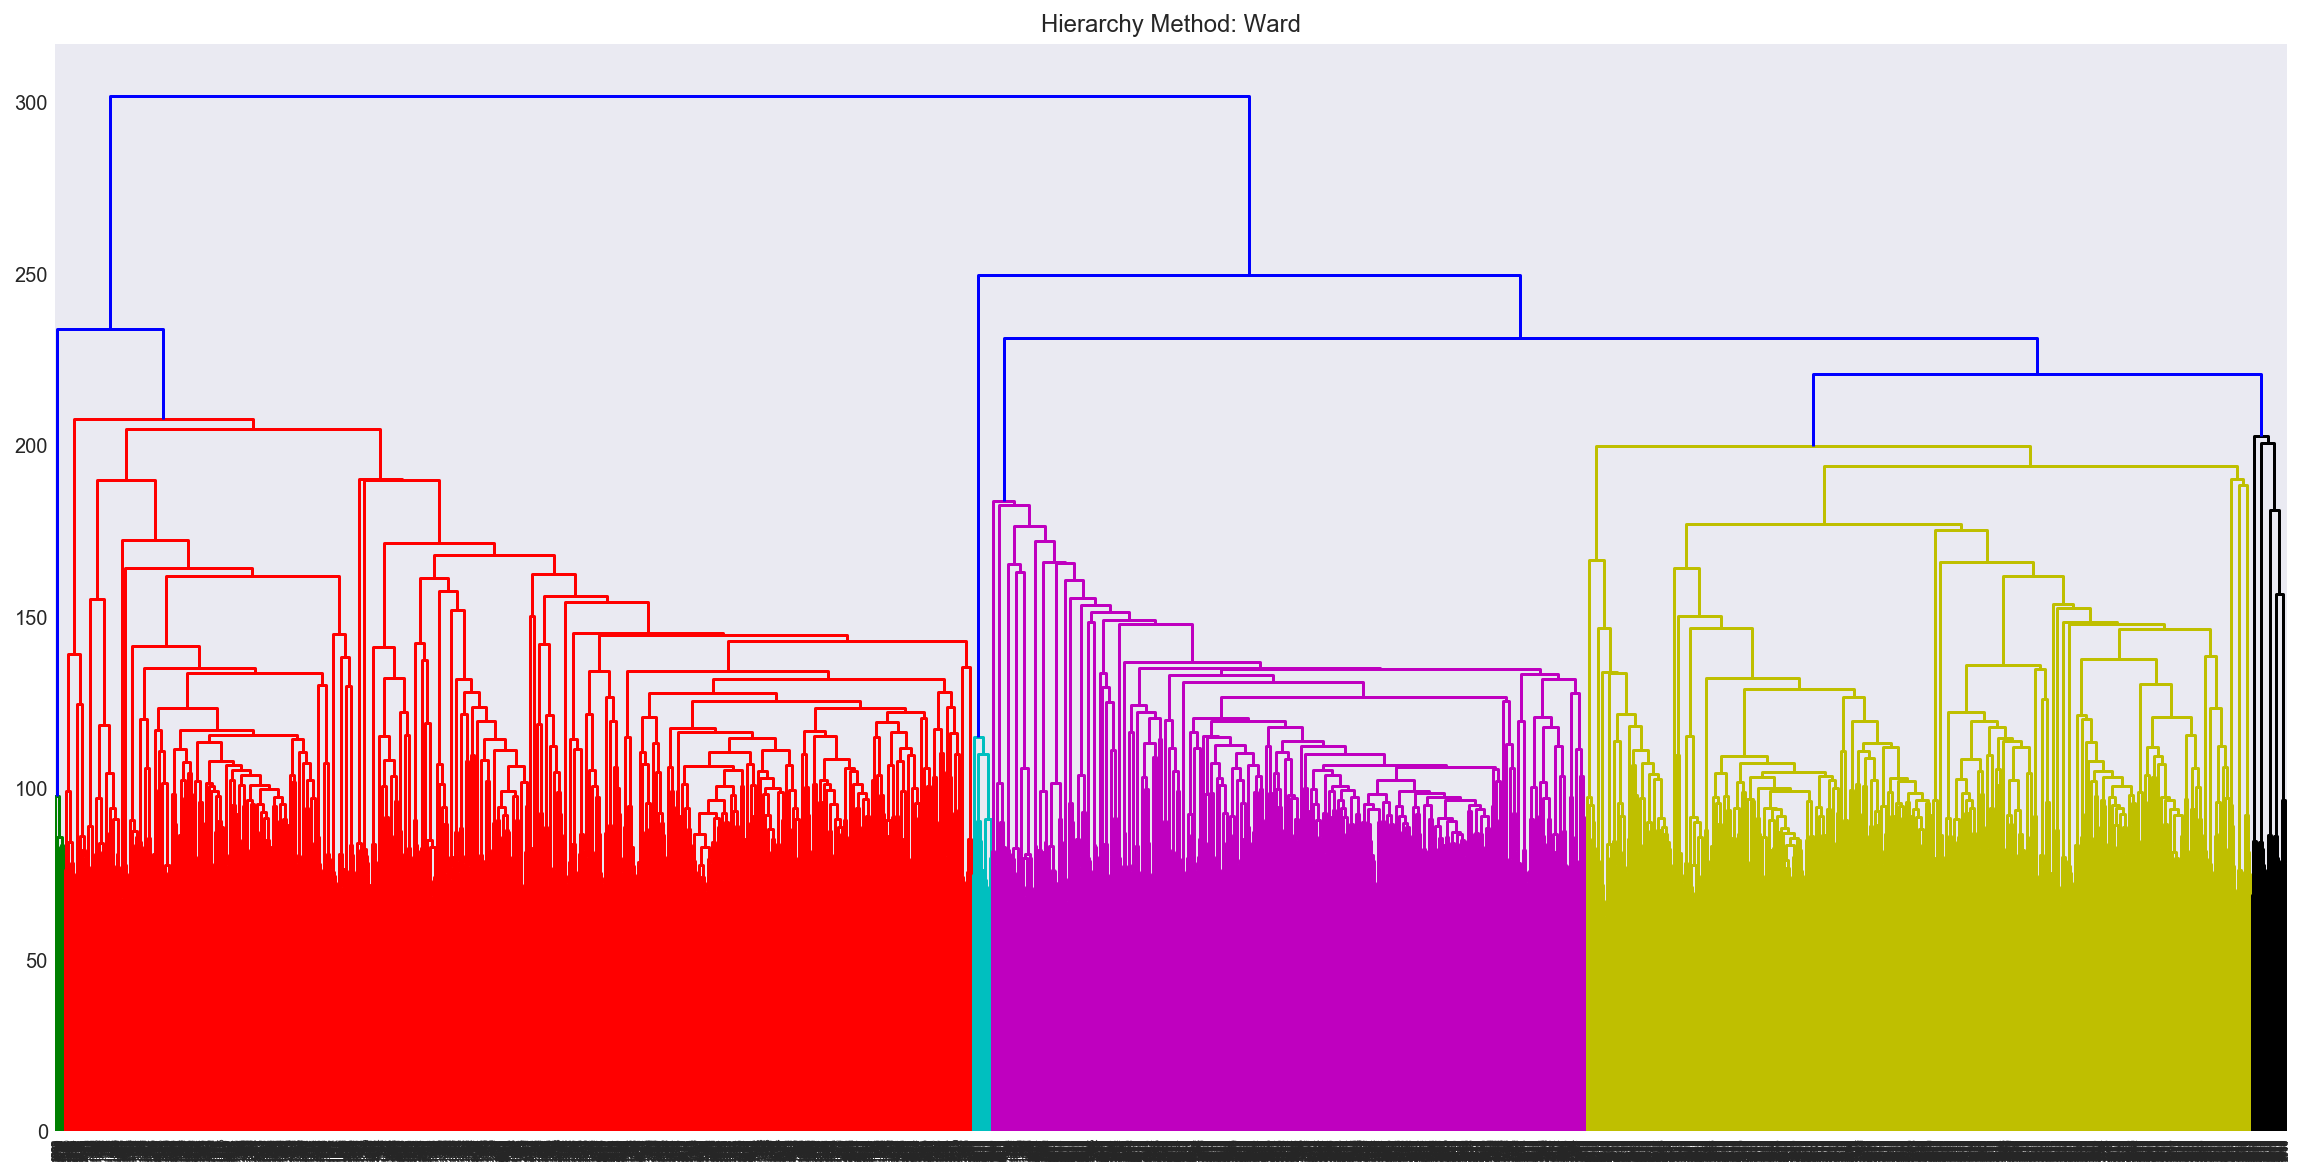

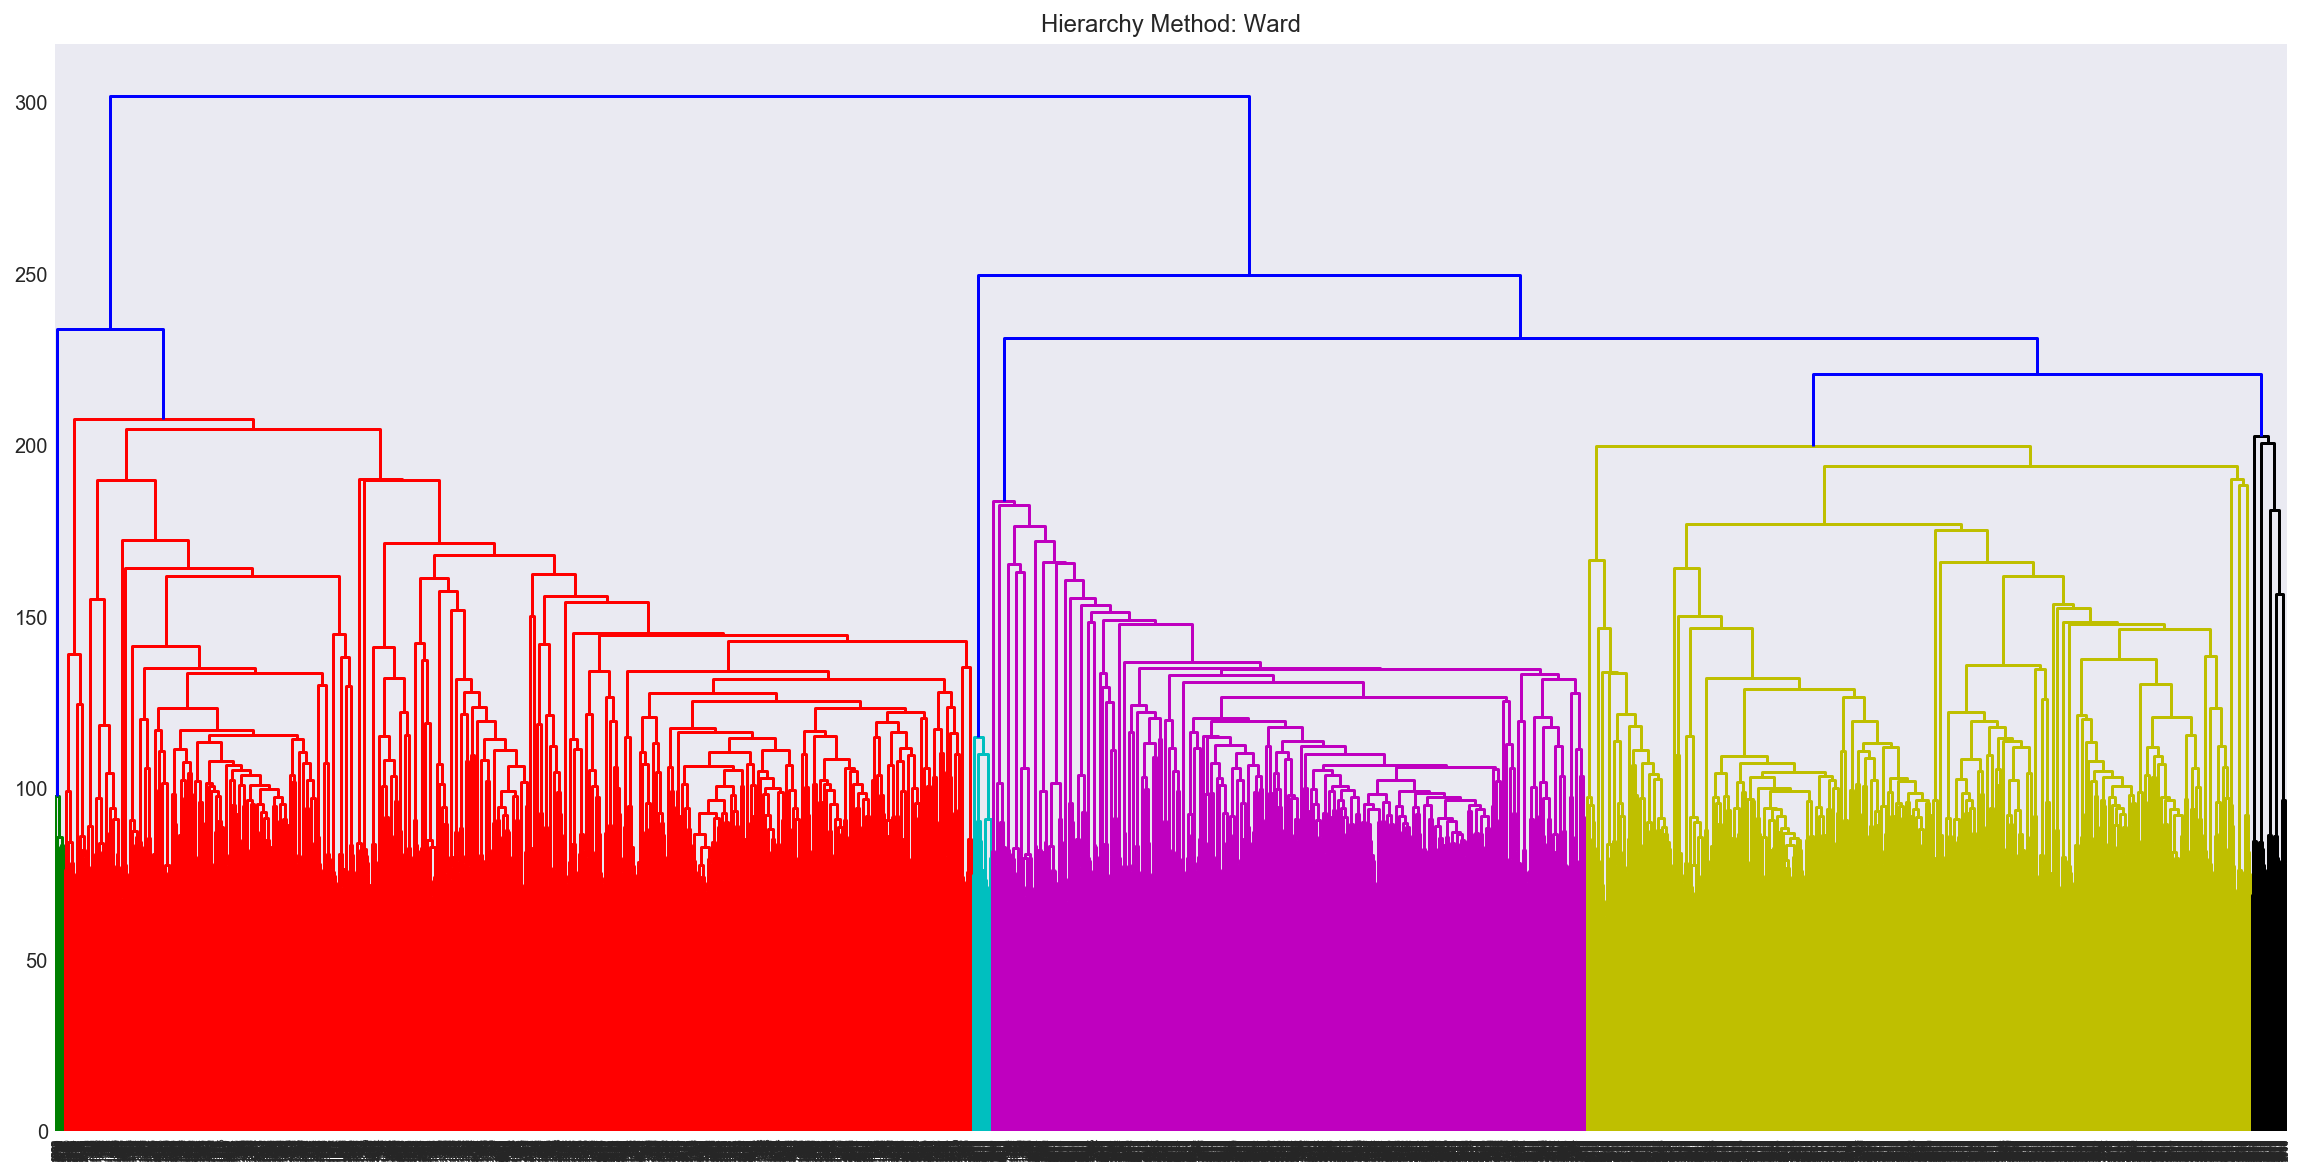

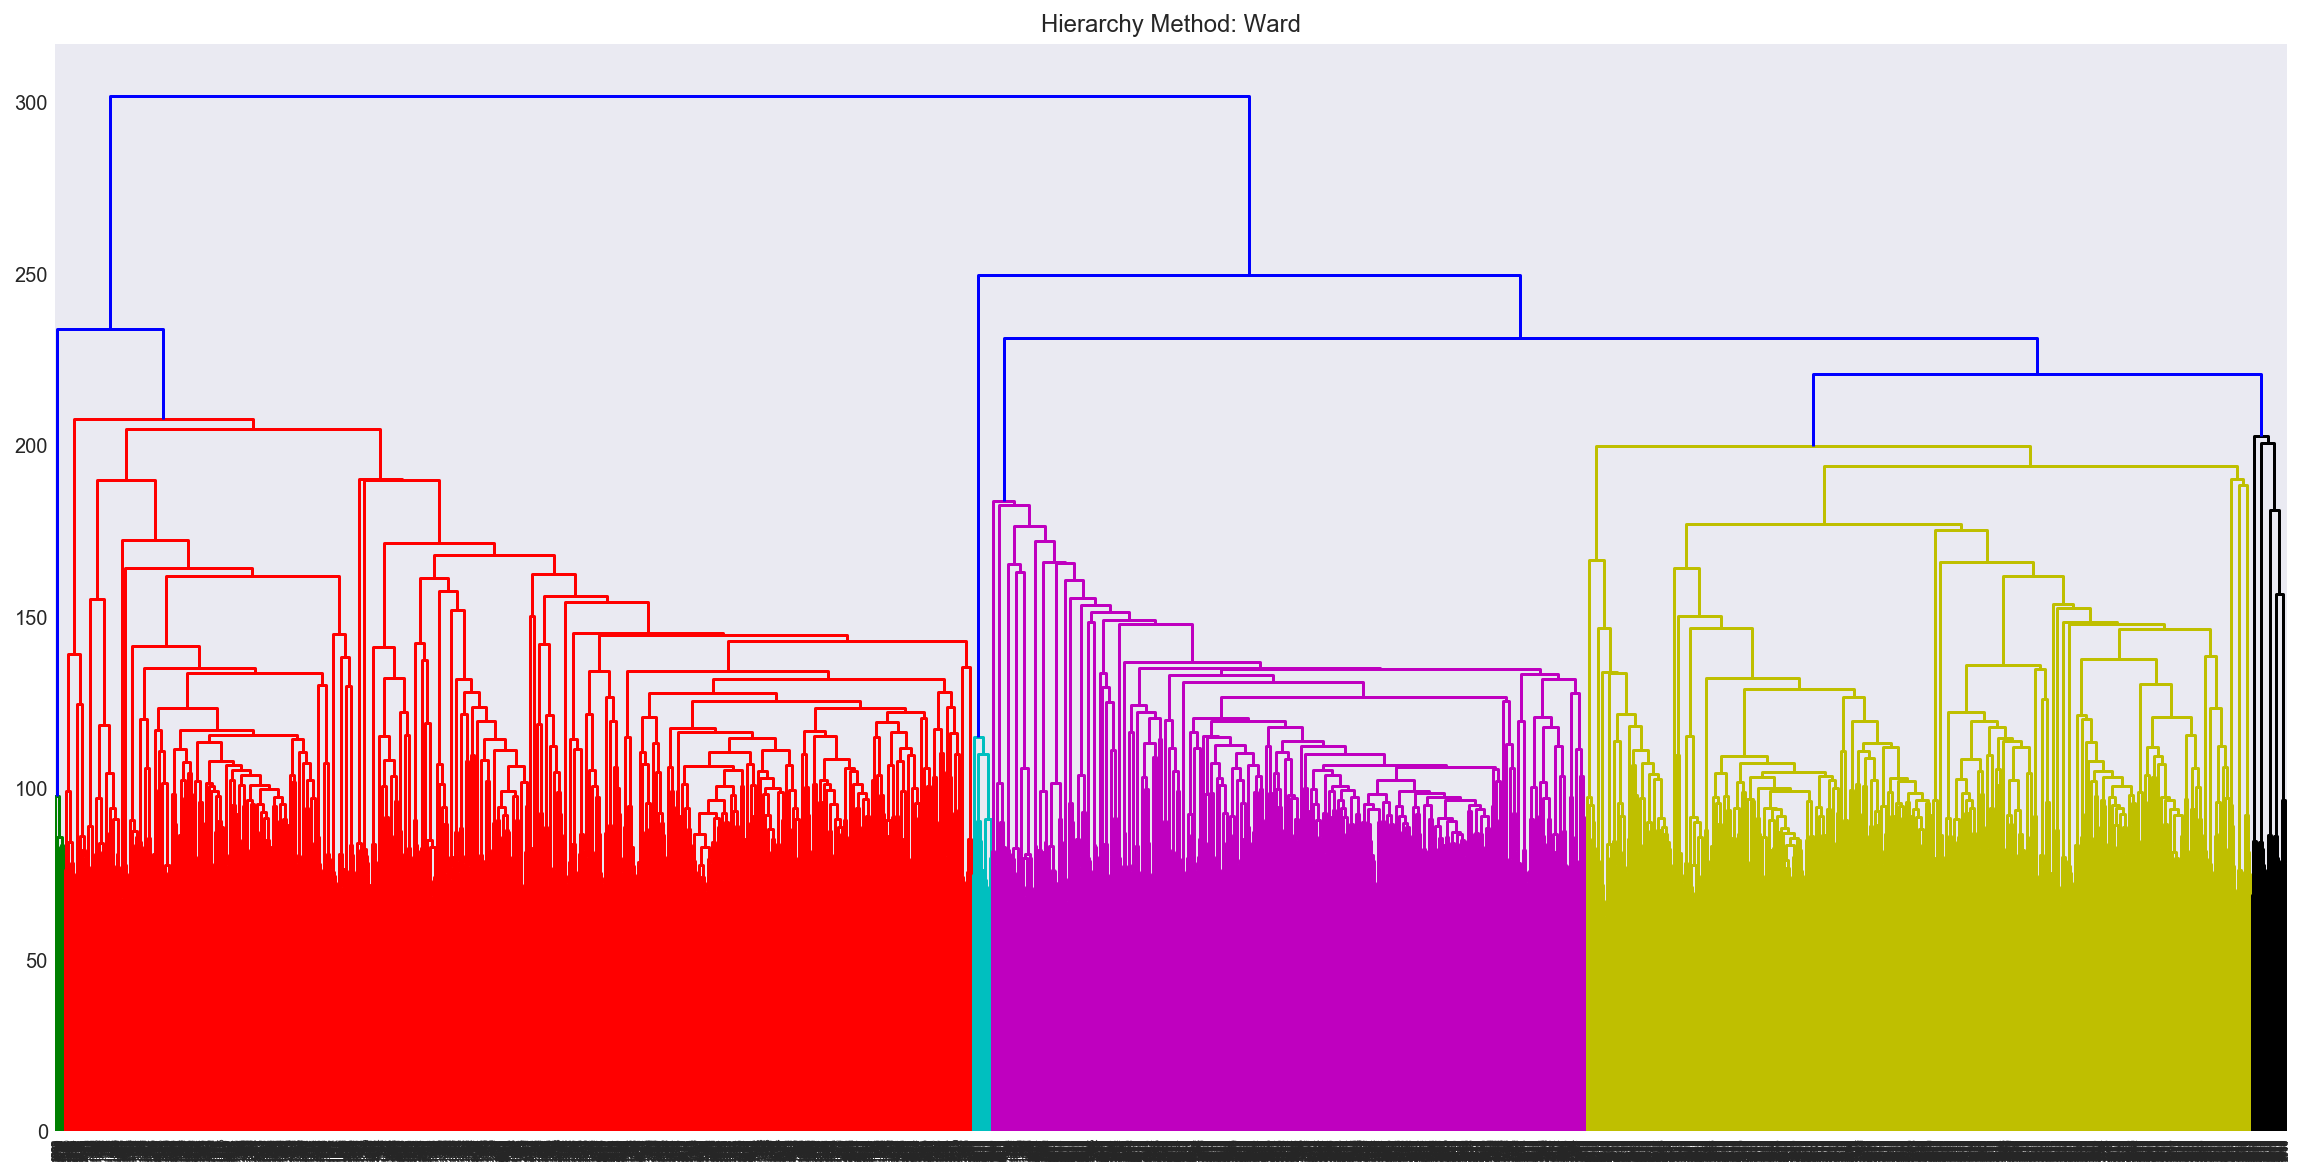

In [1074]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Hierarchical
methods = ['average', 'complete', 'ward'] #all were run, ward looks the best

plt.style.use('seaborn-dark')
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.title(f'Hierarchy Method: Ward')
plt.show()
print('\n')

## Modeling
---

In [1076]:
X = whisky_tfidf.iloc[:,:-1]
Y = whisky['label']

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, n_jobs=-1)

rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [1117]:
test_input = 'I would like a oak single malt scotch'

test_input = formatting(test_input)
test_input = [preprocess(test_input)]

test_input

['like oak singl malt scotch']

In [1118]:
test_x = tfidf.transform(test_input).toarray()

In [1119]:
whisky_prediction = rfc.predict(test_x)[0]

In [1120]:
whisky_prediction 

'Adirondack Distilling 601 Bourbon, 43.2%'

In [1123]:
THE_WHISKY = whisky[whisky.label == whisky_prediction].head(1)
THE_WHISKY

rating                                     label       category  \
4129      79  Adirondack Distilling 601 Bourbon, 43.2%  Craft Whiskey   

                                                 review    reviewer  year  \
4129  The bottle states “Aged less than four years” ...  Lew Bryson  2015   

       abv  price   age  vintage  \
4129 43.20  65.00  <NA>     <NA>   

                                                   text  
4129  adirondack distil 601 bourbon 43 craft whiskey...

In [1122]:
print(' '.join(THE_WHISKY.label.values))
print('Rating: ' + str(int(THE_WHISKY.rating.values)))
print(' '.join(THE_WHISKY.category))
print(' '.join(THE_WHISKY.review))
print('Price: $' + str(int(THE_WHISKY['price'].values)))

Adirondack Distilling 601 Bourbon, 43.2%
Rating: 79
Craft Whiskey
The bottle states “Aged less than four years” but the nose says probably less than two. Unseasoned oak and sawdust dominate the nose. If you can get through the oak you’ll find honey, corn, cinnamon, and beef jerky. On the palate it’s dry cornmeal, caramel, and a hefty portion of abrasive oak. The mid-palate is big spice with cinnamon, black pepper, clove, and oak. A short dry finish puts a bow on a whiskey that’s overly tannic, dry, and oaky.
Price: $65


## Word2Vec
---

In [900]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import itertools

In [957]:
words = [row.split(',') for row in whisky.text]

In [958]:
words

[['black bowmor 42 year old 1964 vintag 40 singl malt scotch impress whiski evolv incred complex nose palat viscous whiski note sticki toffe earthi oak fig cake roast nut fall fruit pancak batter black cherri ripe peach dark chocol cover espresso bean polish leather tobacco hint wild game linger leafi damp kiln smoke flavor continu palat long swallow hope dream older whiski'],
 ['bowmor 46 year old distil 1964 42 singl malt scotch legendari bowmor mid 60s bite equal share remark aroma tropic fruit move hallucinatori intens guava mango peach pineappl grapefruit light touch peat smoke memori islay realiti concentr low strength palat silki headi haunt last forev dri glass legend bear bottl editor choic'],
 ['johnni walker blue label 40 blend scotch whiski magnific power intens caramel dri peat eleg cigar smoke seed scrap vanilla bean brand new pencil peppercorn coriand seed star anis deepli satisfi nose experi silki caramel bounti fruit ripe peach stew appl orang pith pervas smoke element

In [1027]:
model = Word2Vec(words, size=1000, window=10, min_count=1)
X = model[model.wv.vocab]

<ipython-input-1027-3a2e470cdacd>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


In [1028]:
model.wv.vocab

{'black bowmor 42 year old 1964 vintag 40 singl malt scotch impress whiski evolv incred complex nose palat viscous whiski note sticki toffe earthi oak fig cake roast nut fall fruit pancak batter black cherri ripe peach dark chocol cover espresso bean polish leather tobacco hint wild game linger leafi damp kiln smoke flavor continu palat long swallow hope dream older whiski': <gensim.models.keyedvectors.Vocab at 0x134423a00>,
 'bowmor 46 year old distil 1964 42 singl malt scotch legendari bowmor mid 60s bite equal share remark aroma tropic fruit move hallucinatori intens guava mango peach pineappl grapefruit light touch peat smoke memori islay realiti concentr low strength palat silki headi haunt last forev dri glass legend bear bottl editor choic': <gensim.models.keyedvectors.Vocab at 0x134423fa0>,
 'johnni walker blue label 40 blend scotch whiski magnific power intens caramel dri peat eleg cigar smoke seed scrap vanilla bean brand new pencil peppercorn coriand seed star anis deepli sa

In [1124]:
sentence = 'single malt scotch whisky oak smoky'

formatting(sentence)

'single malt scotch whisky oak smoky'

In [1125]:
process_sentence = preprocess(sentence)

In [1126]:
model.build_vocab([[process_sentence]], update=True)
#model.similar_by_vector(model.wv.__getitem__('craft'))

In [1127]:
choice = model.wv.similar_by_vector(model.wv.__getitem__(process_sentence))[1]

In [1128]:
model.wv.similar_by_vector(model.wv.__getitem__(process_sentence))

[('singl malt scotch whiski oak smoki', 1.0),
 ('old forest birthday kentucki straight 2019 releas 52 bourbon tennesse eleg suppl befit whiskey age 11 year matur show nose concord grape skin leather sassafra ice tea chocol pecan varnish big dark fruit flavor cola spice ginger cook cherri dark chocol generous oak touch water bring pecan lengthi finish draw cola dark chocol leather pepper sip slowli continu evolv glass 13 200 bottl collect',
  0.10204024612903595),
 ('dougla la scallywag cask strength batch 54 blend malt scotch whiski rich marmalad gingersnap dri tropic fruit vanilla pod cinnamon bark abound limit edit dog whiski dougla la includ mortlach macallan glenroth satsuma peel acid settl quick trick green appl spice hazelnut maltes ginger late develop bring plain chocol squar malti intens coffe note water pick chocol orang truffl coffe cup chocol biscuit finish tail wag 800 bottl £50',
  0.10175664722919464),
 ('jura 1984 44 singl malt scotch jura express distil 1984 matur bourb

In [1129]:
W2V_WHISKY = whisky[whisky.text == choice[0]]

In [1130]:
print(' '.join(W2V_WHISKY.label.values))
print('Rating: ' + str(int(THE_WHISKY.rating.values)))
print(' '.join(W2V_WHISKY.category))
print(' '.join(W2V_WHISKY.review))
print('Price: $' + str(int(W2V_WHISKY['price'].values)))

Old Forester Birthday Kentucky Straight (2019 Release), 52.5%
Rating: 79
Bourbon/Tennessee
Elegant and supple, as befits a whiskey aged 11 years. The maturity shows on the nose, which has Concord grape skins, leather, sassafras, iced tea, chocolate, pecans, and varnish. Big dark fruit flavors, cola spices, ginger, cooked cherries, dark chocolate, and generous oak; a touch of water brings out pecans. The lengthy finish draws out cola, dark chocolate, leather, and pepper. Sip slowly; it continues to evolve in the glass. (13,200 bottles) Collectibles
Price: $100


In [1045]:
whisky[whisky.text.str.contains('japan')]

rating                                              label  \
184       93  Chivas Regal 18 year old Ultimate Cask Collect...   
615       90  The Pearls of Scotland (distilled at Invergord...   
787       89                          Longmorn 16 year old, 48%   
1087      88  The Pearls of Scotland (distilled at North of ...   
1348      87                Bowmore Devil’s Cask Batch 2, 56.3%   
...      ...                                                ...   
4926      80          Hanyu 7 of Spades 1990 Cognac cask, 53.8%   
4937      80                   White Oak Akashi 5 year old, 45%   
4943      80      White Oak Akashi Japanese Blended Whisky, 40%   
4944      80                     Chichibu Port Pipe 2009, 54.5%   
4960      78                        Yamazakura 16 year old, 40%   

                        category  \
184        Blended Scotch Whisky   
615   Blended Malt Scotch Whisky   
787           Single Malt Scotch   
1087  Blended Malt Scotch Whisky   
1348          Single Malt Scotch   
...                          ...   
4926             Japanese Whisky   
4937             Japanese Whisky   
4943             Japanese Whisky   
4944             Japanese Whisky   
4960             Japanese Whisky   

                                                 review         reviewer  \
184   A blast of exotic spices, followed by sweet oa...  Jonny McCormick   
615   Holy Moly! Where do they find them? Over 40 ye...  Jonny McCormick   
787   Longmorn may be slightly better known, but it’...       Dave Broom   
1087  The North of Scotland distillery (formerly Str...  Jonny McCormick   
1348  Last year’s was a top-notch, defiantly sherrie...       Dave Broom   
...                                                 ...              ...   
4926  Aged exclusively in cognac casks, here is Hany...  Jonny McCormick   
4937  The Eigashima distillery, on the Akashi Strait...  Dominic Roskrow   
4943  Like a trip to the stalls of an old spice mark...       Dave Broom   
4944  Matured in 500-liter port pipes, the color is ...  Dominic Roskrow   
4960  Age statements are disappearing from Japanese ...  Dominic Roskrow   

      year   abv  price   age  vintage  \
184   2019 48.00 130.00    18     <NA>   
615   2014 43.40 246.00  <NA>     1972   
787   2011 48.00 110.00    16     <NA>   
1087  2014 43.30 262.00  <NA>     1971   
1348  2014 56.30  95.00  <NA>     <NA>   
...    ...   ...    ...   ...      ...   
4926  2019 53.80 146.00  <NA>     1990   
4937  2012 45.00  85.00     5     <NA>   
4943  2013 40.00  45.00  <NA>     <NA>   
4944  2011 54.50 152.00  <NA>     2009   
4960  2014 40.00 138.00    16     <NA>   

                                                   text  
184   chiva regal 18 year old ultim cask collect jap...  
615   pearl scotland distil invergordon 1972 43 blen...  
787   longmorn 16 year old 48 singl malt scotch long...  
1087  pearl scotland distil north scotland 1971 43 b...  
1348  bowmor devil cask batch 56 singl malt scotch y...  
...                                                 ...  
4926  hanyu spade 1990 cognac cask 53 japanes whiski...  
4937  white oak akashi year old 45 japanes whiski ei...  
4943  white oak akashi japanes blend whiski 40 japan...  
4944  chichibu port pipe 2009 54 japanes whiski matu...  
4960  yamazakura 16 year old 40 japanes whiski age s...  

[124 rows x 11 columns]